Vytvoření složky pro model

In [1]:
from pathlib import Path
output_dir = Path("model_categorizer")
if not output_dir.exists():
    output_dir.mkdir()

Načtení balíčků

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Načtení datasetu

In [3]:
df = pd.read_csv("hotel_reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Samplování

In [4]:
df = df.sample(frac = 0.2, replace = False, random_state=50)

Spojení negativních a pozitivních recenzí

In [5]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]

Smazání "no negative" a "no positive"

In [6]:
df["review"] = df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review
469543,Valencia 157 Eixample 08011 Barcelona Spain,230,5/5/2016,8.2,Sunotel Club Central,Lithuania,Wifi could be better,5,2836,Good location clean helpfull staff,6,5,7.9,"[' Leisure trip ', ' Couple ', ' Basic Double ...",455 day,41.387930,2.156806,Wifi could be better Good location clean help...
305034,Corso Sempione 69 Fiera Milano City 20149 Mila...,101,2/12/2016,8.2,Qualys Hotel Nasco,United Kingdom,Can t think of anything,6,1658,Clean room doble bed even for sgl person big ...,29,5,9.2,"[' Business trip ', ' Solo traveler ', ' Singl...",538 day,45.484881,9.159646,Can t think of anything Clean room doble bed ...
41674,123 Rue Du Faubourg Saint Honor 8th arr 75008 ...,25,7/28/2017,9.2,Le 123 Elysees Astotel,Saudi Arabia,We need little bit variety of breakfast options,9,171,Location and people working there,6,14,7.9,"[' Leisure trip ', ' Family with young childre...",6 days,48.873082,2.309659,We need little bit variety of breakfast optio...
211462,53 Upper Street Islington London N1 0UY United...,429,6/20/2017,8.6,Hilton London Angel Islington,United Kingdom,we thing the air con could be a lot cooler,11,1462,everything,2,2,10.0,"[' Leisure trip ', ' Couple ', ' Terrace Suite...",44 days,51.536091,-0.104818,we thing the air con could be a lot cooler ev...
182857,41 51 Inverness Terrace Westminster Borough Lo...,154,7/21/2017,8.0,La Suite West Hyde Park,Ireland,No Negative,0,768,Perfect Location,4,3,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",13 days,51.512676,-0.186783,Perfect Location


Načtení knihovny seaborn

In [7]:
 import seaborn as sns

Rozložení hodnocení cestovatelů

In [8]:
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50, 18
rcParams["axes.labelsize"] = 16

<AxesSubplot:xlabel='Reviewer_Score', ylabel='count'>

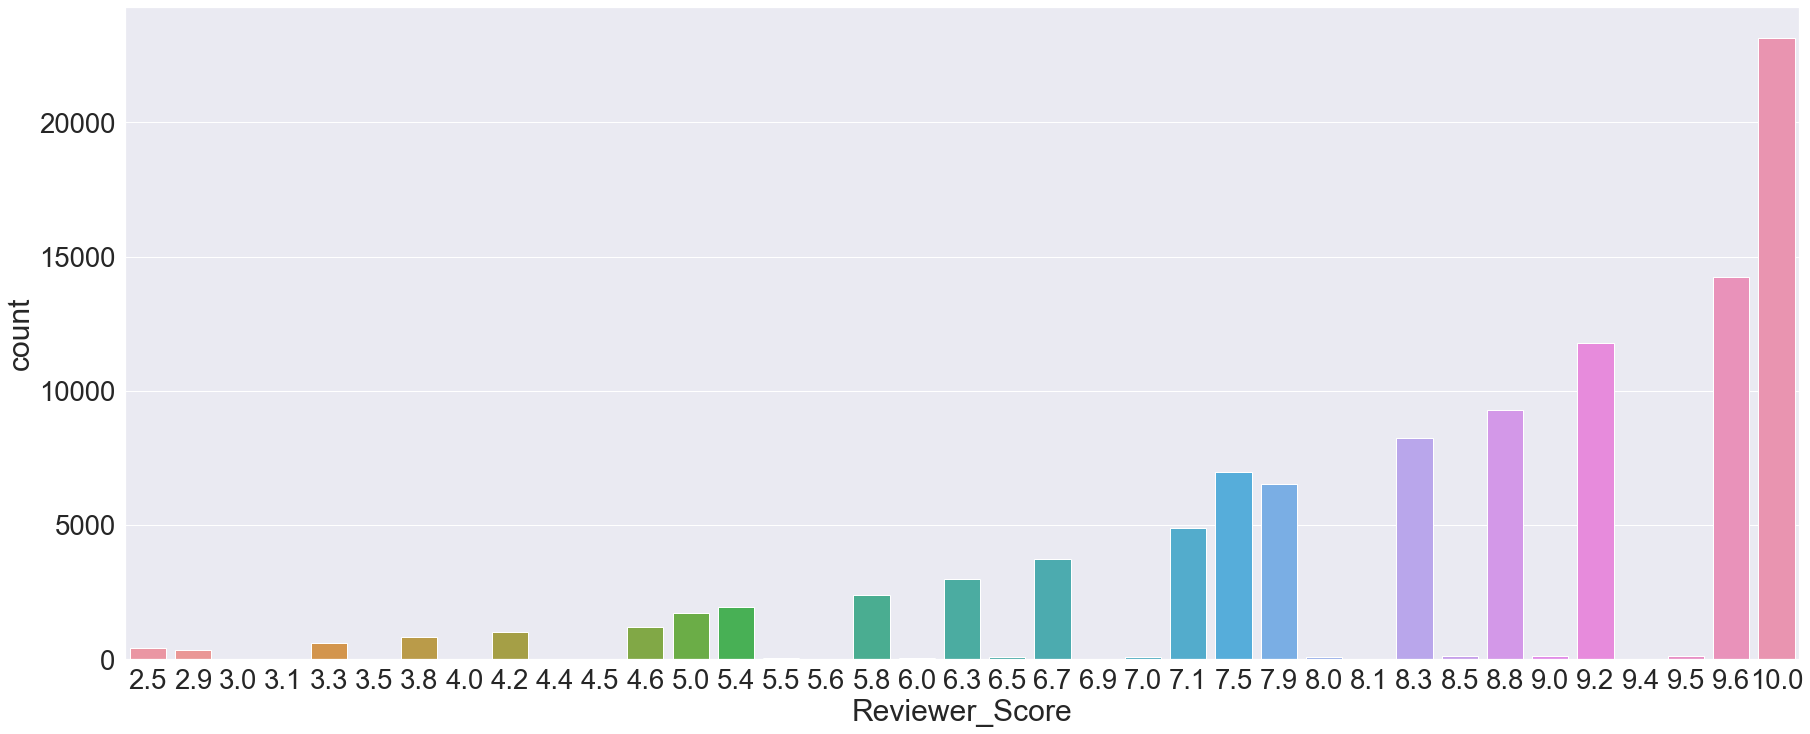

In [9]:
df_plot = df["Reviewer_Score"]
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Reviewer_Score",data=df)

Průměrné hodnocení hotelů

<AxesSubplot:xlabel='Average_Score', ylabel='count'>

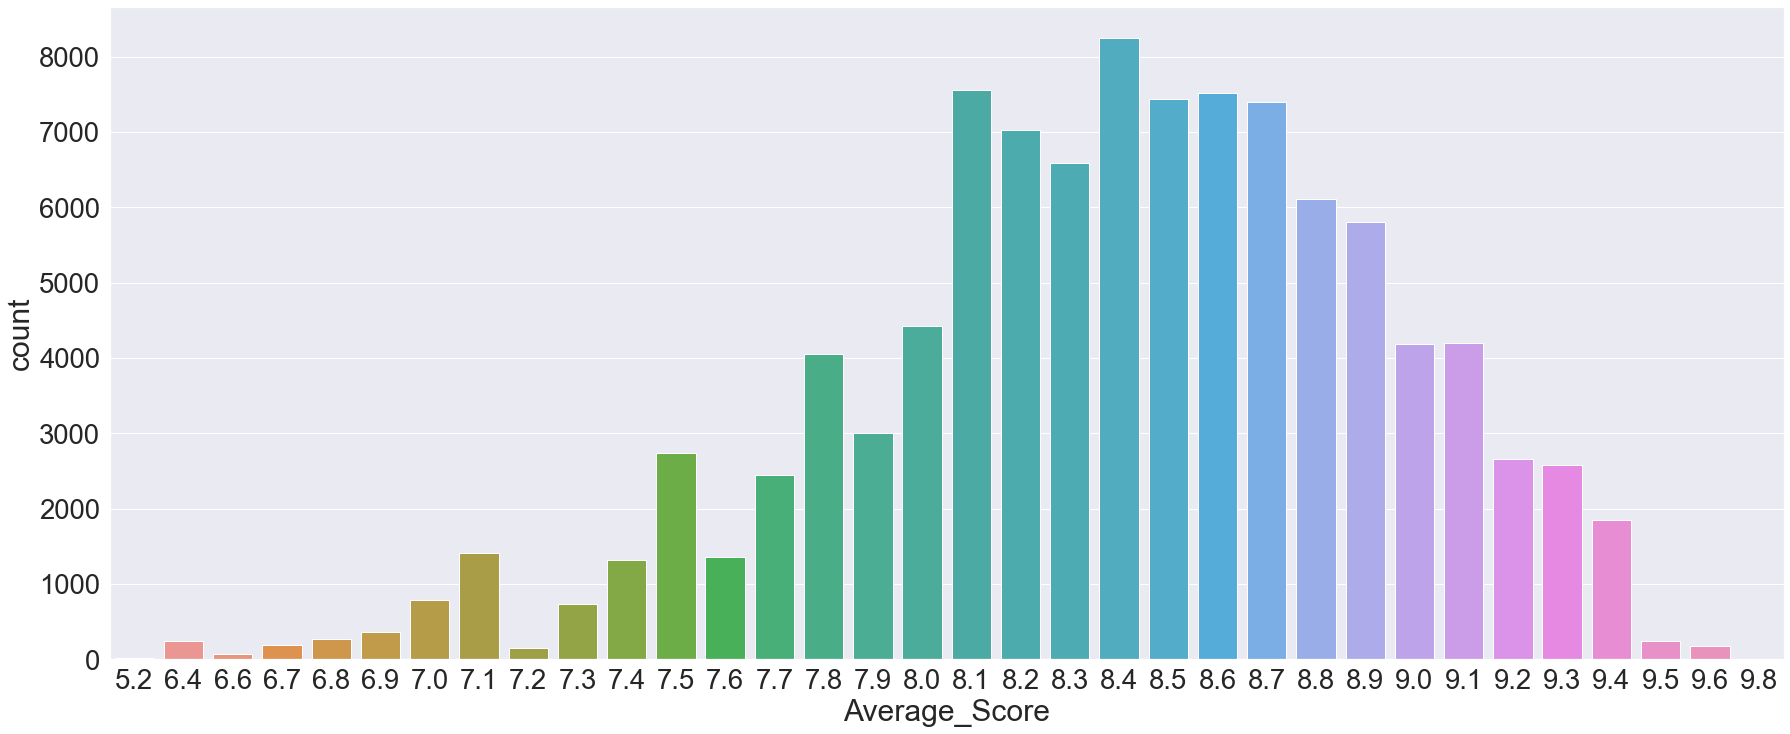

In [10]:
df_plot = df["Average_Score"]
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=df)

In [58]:
df.Average_Score.describe()

count    11201.000000
mean         8.168208
std          0.618377
min          5.200000
25%          7.800000
50%          8.200000
75%          8.600000
max          9.800000
Name: Average_Score, dtype: float64

Státy, ve kterých se hotely nacházejí

In [59]:
df.Hotel_Address[10]

'8 10 Rue F licien David 16th arr 75016 Paris France'

<AxesSubplot:title={'center':'Hotel distribution in States'}>

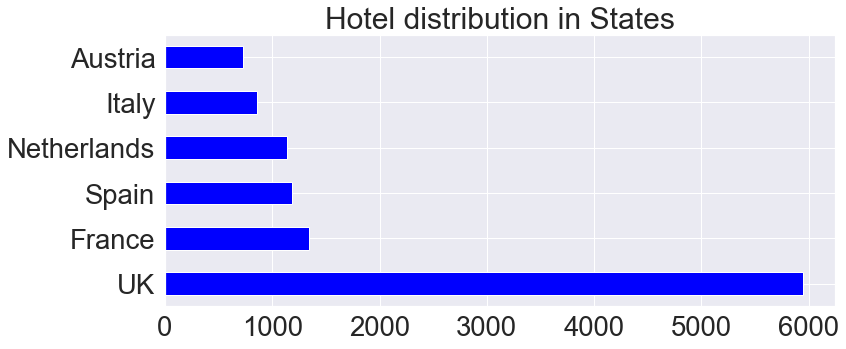

In [60]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['State'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in States')
df.State.value_counts().plot.barh(color = 'blue')

Nejllépe hodnocené hotely

In [61]:
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score', ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
8227,Ritz Paris,9.8,122
10480,Hotel Casa Camper,9.6,732
2364,Haymarket Hotel,9.6,255
8188,Hotel The Serras,9.6,604
6958,41,9.6,244
7698,H10 Casa Mimosa 4 Sup,9.6,454
8857,Charlotte Street Hotel,9.5,319
2003,The Soho Hotel,9.5,385
10728,Taj 51 Buckingham Gate Suites and Residences,9.5,310
10501,Waldorf Astoria Amsterdam,9.5,443


Nejčastější národnosti cestovatelů

In [62]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [63]:
text = ""
for i in range(df.shape[1]):
    text = " ".join([text,df["Reviewer_Nationality"].values[i]])

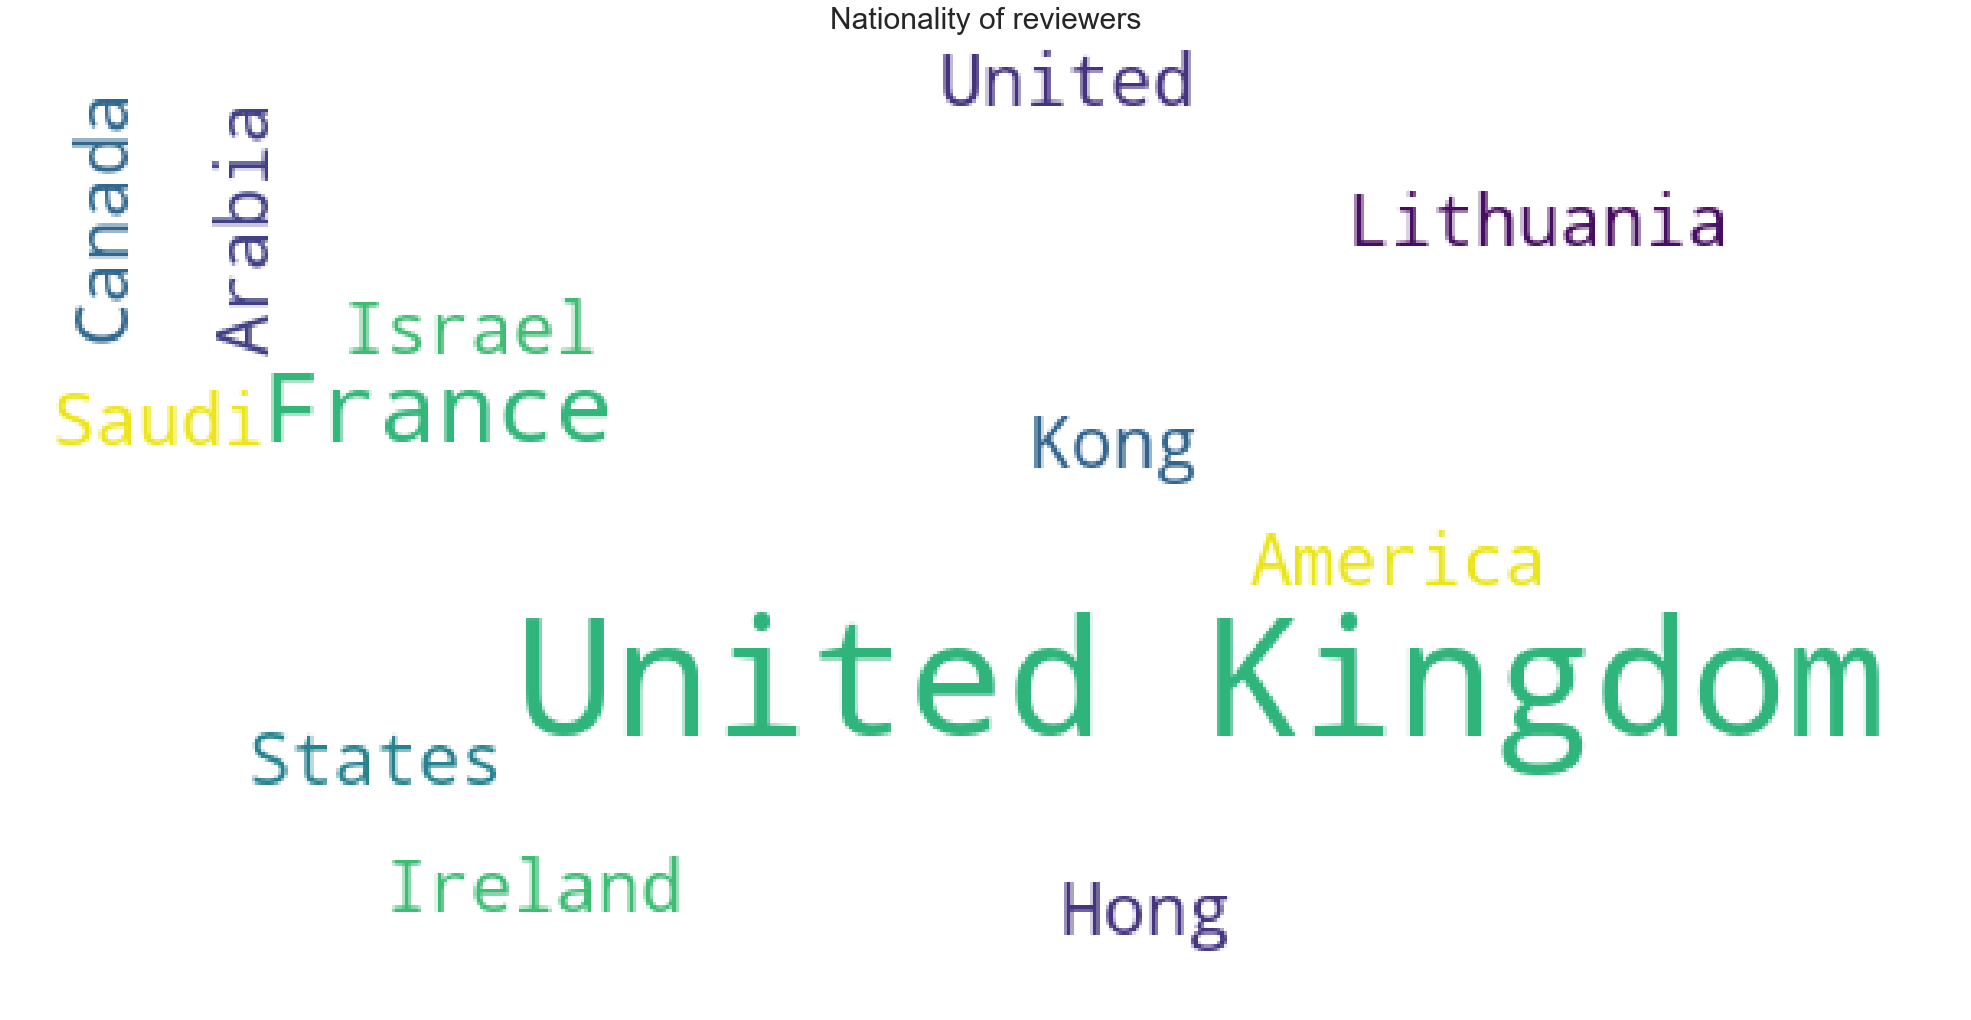

In [17]:
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=100).generate(text)
wordcloud.recolor(random_state=312)
plt.imshow(wordcloud)
plt.title("Nationality of reviewers")
plt.axis("off")
plt.show()

Analýza sentimentu

<AxesSubplot:xlabel='sentiment', ylabel='count'>

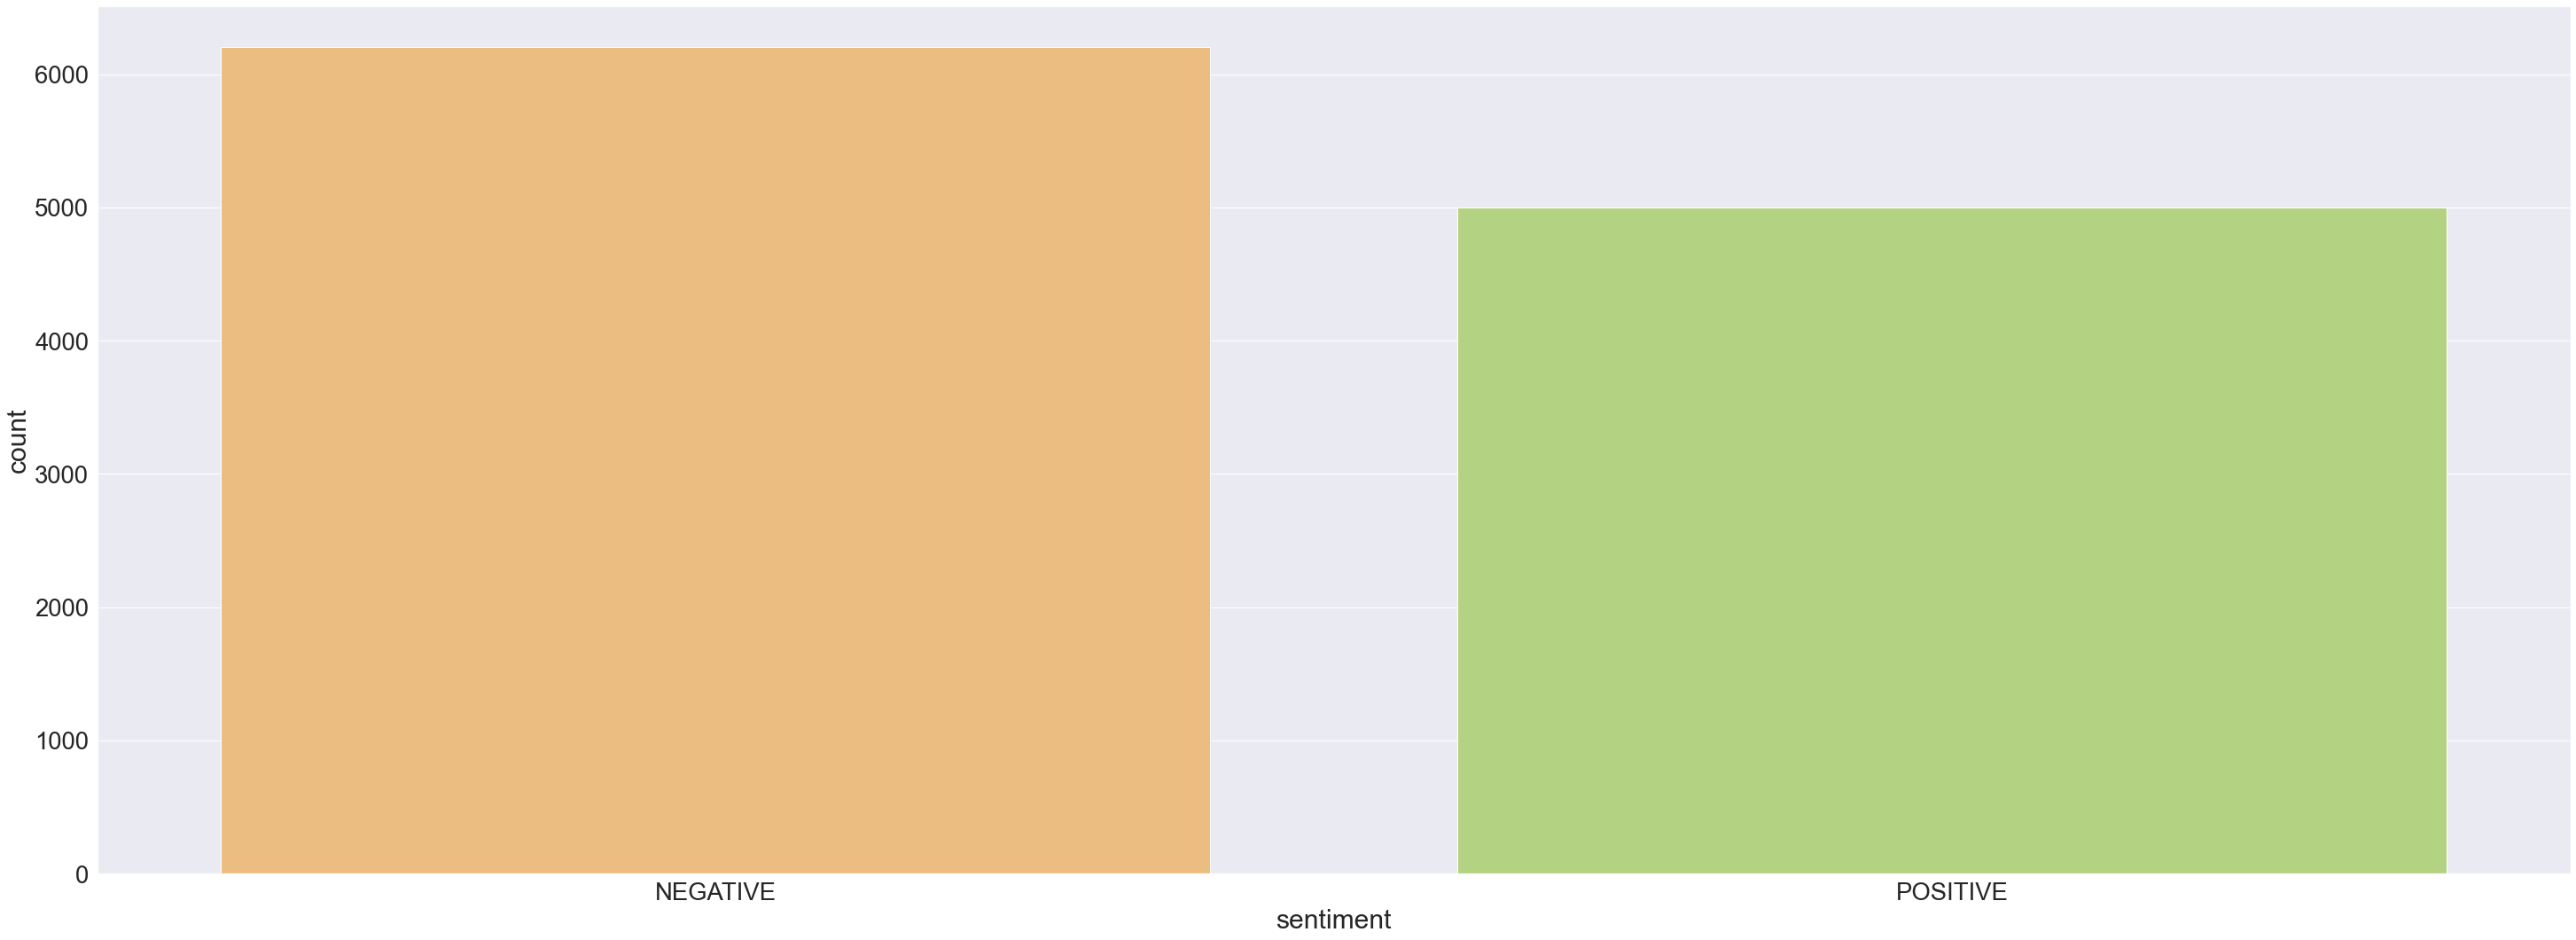

In [64]:
df["sentiment"] = pd.cut(df["Reviewer_Score"], 
                   bins=[0,5,10], 
                   labels=["NEGATIVE", "POSITIVE"])
sns.countplot(x="sentiment", data=df, palette="RdYlGn")

In [65]:
 df.groupby("sentiment").count()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,State,cats,text
sentiment,,,,,,,,,,,,,,,,,,,,,
NEGATIVE,6201,6201,6201,6201,6201,6201,6201,6201,6201,6201,...,6201,6201,6201,6201,6168,6168,6201,6201,6201,6201
POSITIVE,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,4964,4964,5000,5000,5000,5000


Vyvážení dat

In [66]:
df_neg = df[df.sentiment=="NEGATIVE"]
df_pos = df[df.sentiment=="POSITIVE"]

In [67]:
 df_pos = df_pos.sample(5000)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

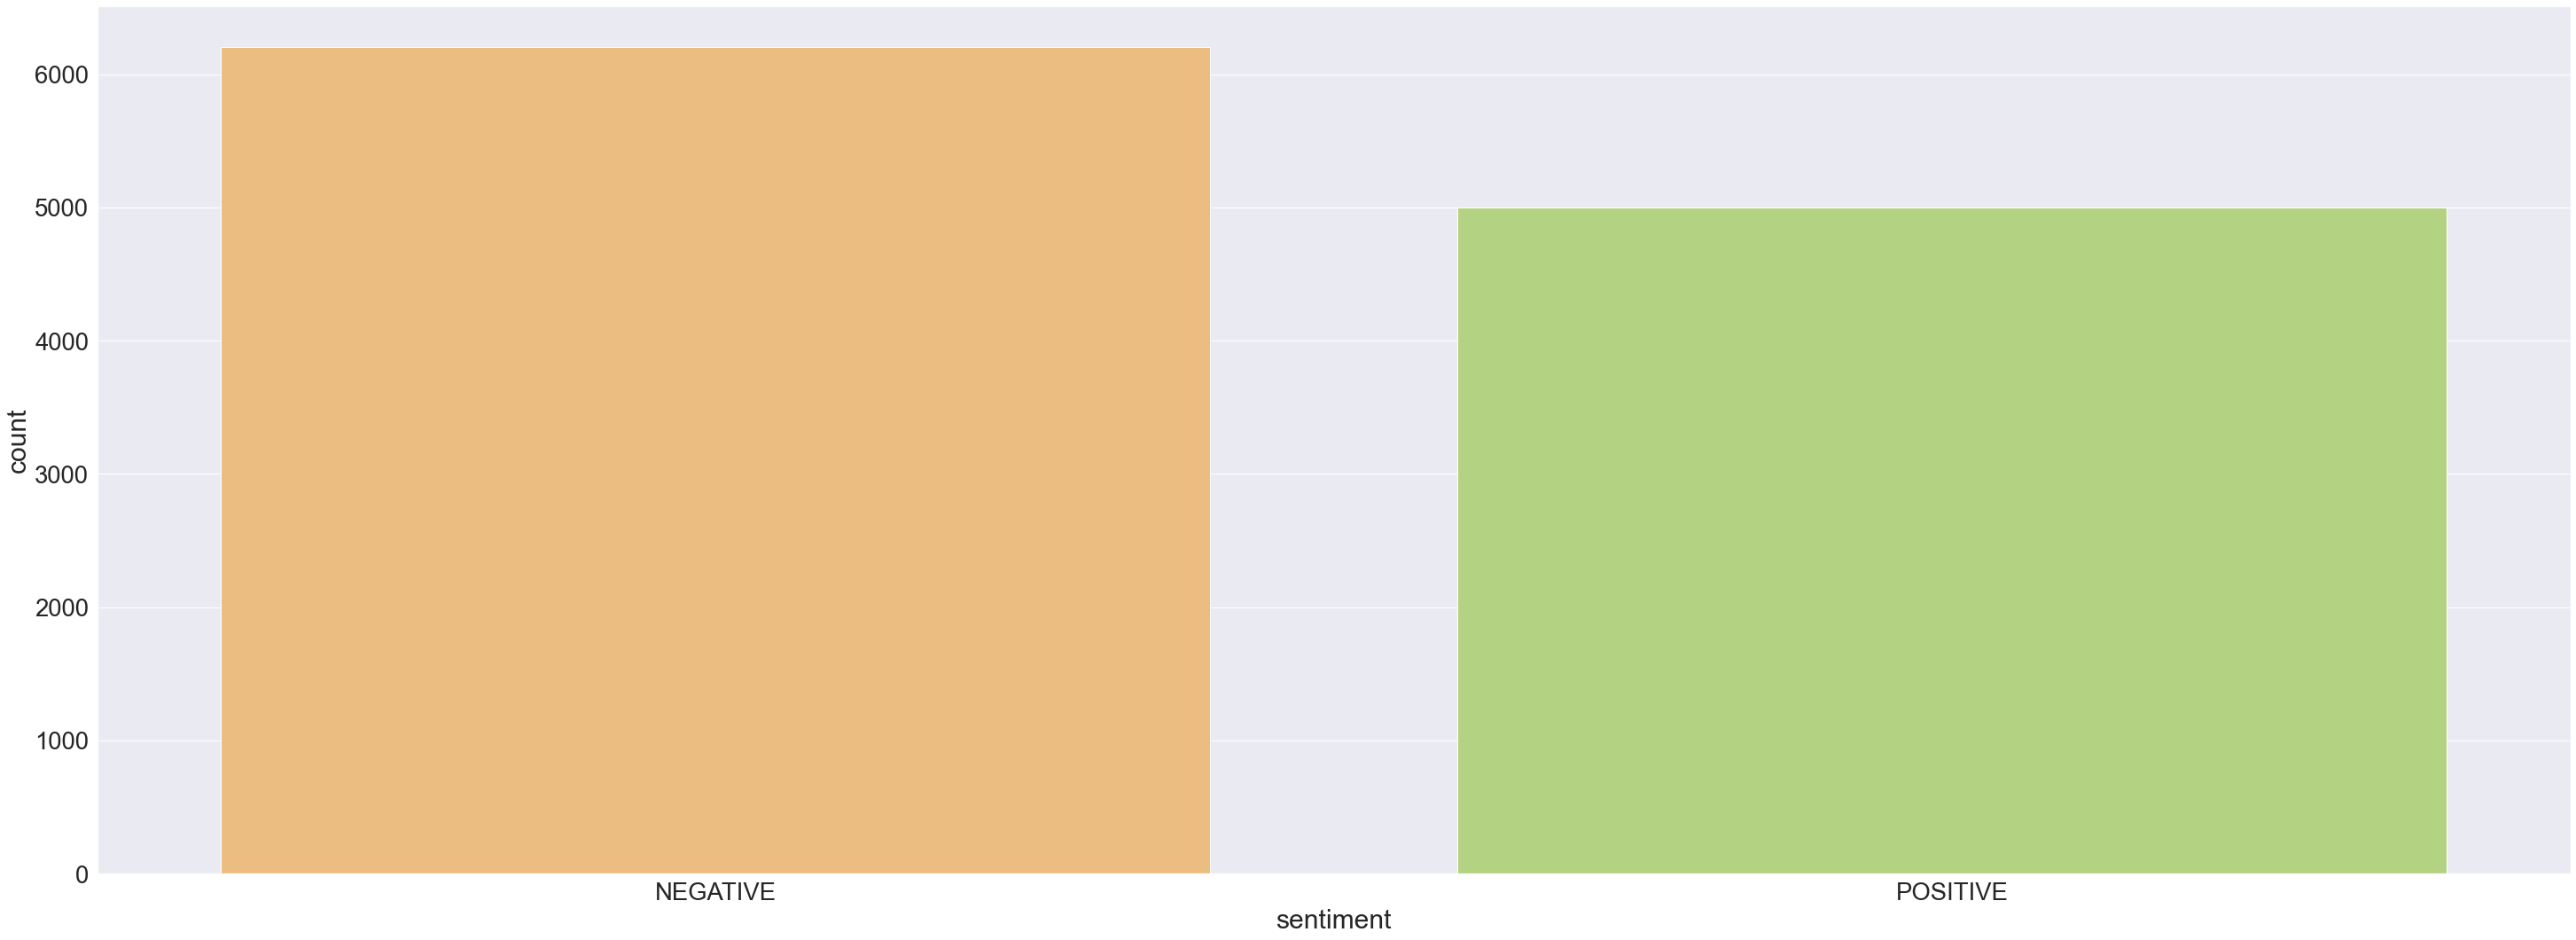

In [68]:
df = pd.concat([df_neg, df_pos], ignore_index=True)
sns.countplot(x="sentiment", data=df, palette="RdYlGn")

In [69]:
 df["cats"] = [{"POSITIVE": y=="POSITIVE", "NEGATIVE": y=="NEGATIVE"} for y in df.sentiment]

Rozdělení na trénovací a testovací data

In [70]:
df = df.sample(frac=1)
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Reviewer_Score,Tags,days_since_review,lat,lng,review,State,sentiment,cats,text
5620,Great Cumberland Place Westminster Borough Lon...,1190,11/24/2016,7.5,The Cumberland A Guoman Hotel,Ireland,Rooms were very small bathroom doors were glass,9,5180,No Positive,...,4.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",252 day,51.514879,-0.160650,Rooms were very small bathroom doors were glass,UK,NEGATIVE,"{'POSITIVE': False, 'NEGATIVE': True}",Rooms were very small bathroom doors were gla...
3150,163 Marsh Wall Docklands Tower Hamlets London ...,2682,4/16/2017,7.1,Britannia International Hotel Canary Wharf,United Kingdom,Was advised to switch rooms to have two singl...,129,9086,Walking distance from Canary Wharf and surrou...,...,4.6,"[' Leisure trip ', ' Couple ', ' Standard Doub...",109 day,51.501910,-0.023221,Was advised to switch rooms to have two singl...,UK,NEGATIVE,"{'POSITIVE': False, 'NEGATIVE': True}",Was advised to switch rooms to have two singl...
1867,17 25 Sloane Street Knightsbridge Kensington a...,759,9/8/2016,7.5,Millennium Hotel London Knightsbridge,Saudi Arabia,Nothing,2,2746,Very old hotel small rooms and not worth the ...,...,4.6,"[' Leisure trip ', ' Solo traveler ', ' Standa...",329 day,51.499968,-0.159993,Nothing Very old hotel small rooms and not wo...,UK,NEGATIVE,"{'POSITIVE': False, 'NEGATIVE': True}",Nothing Very old hotel small rooms and not wo...
5417,Via Gaetano Airaghi 125 20153 Milan Italy,229,12/5/2016,6.9,Idea Hotel Milano San Siro,Macedonia,My boss Laste Zafirovski organize the busines...,88,5742,No Positive,...,2.5,"[' Business trip ', ' Group ', ' Twin Room ', ...",241 day,45.472065,9.077787,My boss Laste Zafirovski organize the busines...,Italy,NEGATIVE,"{'POSITIVE': False, 'NEGATIVE': True}",My boss Laste Zafirovski organize the busines...
9366,Fizeaustraat 2 Oost 1097 SC Amsterdam Netherlands,188,1/23/2017,9.1,Hotel V Fizeaustraat,Netherlands,I can not think about one thing that I did no...,17,1708,This Hotel is from now of on my favorite The ...,...,10.0,"[' Leisure trip ', ' Couple ', ' Double Room '...",192 day,52.345151,4.925237,I can not think about one thing that I did no...,Netherlands,POSITIVE,"{'POSITIVE': True, 'NEGATIVE': False}",I can not think about one thing that I did no...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,Rosell n 174 176 Eixample 08036 Barcelona Spain,164,5/3/2017,8.5,Bcn Urban Hotels Gran Rosellon,United Kingdom,gym closed noise from other rooms was bit muc...,20,2383,Location bathroom facilities and hotel room l...,...,7.9,"[' Business trip ', ' Group ', ' Economy Doubl...",92 days,41.422665,2.146426,gym closed noise from other rooms was bit muc...,Spain,POSITIVE,"{'POSITIVE': True, 'NEGATIVE': False}",gym closed noise from other rooms was bit muc...
5453,Koninginneweg 34 36 Oud Zuid 1075 CZ Amsterdam...,313,10/24/2016,7.5,Park Plaza Vondelpark Amsterdam,Czech Republic,Almost everything was not to my liking no ide...,22,2176,Lobby is interestint,...,5.0,"[' Leisure trip ', ' Couple ', ' Executive Kin...",283 day,52.354266,4.866436,Almost everything was not to my liking no ide...,Netherlands,NEGATIVE,"{'POSITIVE': False, 'NEGATIVE': True}",Almost everything was not to my liking no ide...
2715,Gudrunstra e 184 10 Favoriten 1100 Vienna Austria,191,5/2/2017,8.2,Rainers Hotel Vienna,Australia,Poorly maintained hotel overheated small room...,32,1852,No Positive,...,3.3,"[' Leisure trip ', ' Couple ', ' Superior Twin...",93 days,48.179189,16.362537,Poorly maintained hotel overheated small room...,Austria,NEGATIVE,"{'POSITIVE': False, 'NEGATIVE': True}",Poorly maintained hotel overheated small room...
8026,65 73 Shaftesbury Avenue Westminster Borough L...,531,5/31/2016,9.0,The Piccadilly London West End,United Kingdom,No prop

In [25]:
 split = 0.8
split_row = int(len(df) * split)
split_row

8960

In [71]:
 df_test = df[split_row:]

len(df_test)

2241

In [72]:
df_train = df[:split_row]

len(df_train)

8960

In [73]:
 train_data = list(zip(df_train["review"], [{"cats": cats} for cats in df_train["cats"]]))
test_data = list(zip(df_test["review"], [{"cats": cats} for cats in df_test["cats"]]))

train_data[:3]

[(' Rooms were very small bathroom doors were glass',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}),
 (' Was advised to switch rooms to have two single beds at the check in as we would get a window view The view was of pipes and the window wouldn t even open Was told we could push the two beds together but all night they just kept sliding apart and we were barely able to sleep The AC was very noisy and if we turned it off the room got uncomfortably warm Found dust in the room and there was no was no toothpaste or toilet brush in the bathroom People in the rooms nearby were very loud at times at night any it resulted in us having s very disrupted sleep Not the first time that I ve stayed here so I am very disappointed  Walking distance from Canary Wharf and surrounding restaurants',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}),
 (' Nothing Very old hotel small rooms and not worth the price',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]

Načtení spaCy

In [74]:
import spacy
nlp = spacy.load("en_core_web_md")

In [75]:
textcat = nlp.create_pipe("textcat",
                          config={"exclusive_classes": True,
                                  "architecture": "simple_cnn"})

In [76]:
nlp.add_pipe(textcat, last=True)

In [77]:
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

textcat.labels

('POSITIVE', 'NEGATIVE')

In [78]:
from spacy.util import minibatch, compounding

In [79]:
batch_sizes = compounding(1.0, 32.0, 1.5)
for x in range(12): print(next(batch_sizes))

1.0
1.5
2.25
3.375
5.0625
7.59375
11.390625
17.0859375
25.62890625
32.0
32.0
32.0


In [80]:
batch_sizes = compounding(1.0, 4.0, 1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [(' Was advised to switch rooms to have two single beds at the check in as we would get a window view The view was of pipes and the window wouldn t even open Was told we could push the two beds together but all night they just kept sliding apart and we were barely able to sleep The AC was very noisy and if we turned it off the room got uncomfortably warm Found dust in the room and there was no was no toothpaste or toilet brush in the bathroom People in the rooms nearby were very loud at times at night any it resulted in us having s very disrupted sleep Not the first time that I ve stayed here so I am very disappointed  Walking distance from Canary Wharf and surrounding restaurants', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]

batch: 1 [(' Nothing Very old hotel small rooms and not worth the price', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]

batch: 2 [(' My boss Laste Zafirovski organize the business trip in this Hotel for 8 persons plus 6 persons but unfortunat

In [81]:
n_iter = 50

In [82]:
dropout = 0.7

In [83]:
# get names of other pipes to disable them during training
pipe_exceptions = ["textcat"] #, "trf_wordpiecer", "trf_tok2vec"
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [84]:
from sklearn import metrics # funkce pro skóring
import matplotlib.pyplot as plt # pro přístup k zobrazování grafu v iteracích
import numpy as np # numpy pro generování náhodných čísel

In [85]:
y = df_test["sentiment"] # ["POSITIVE", "NEGATIVE", "POSITIVE", "NEGATIVE", ...]
random_scores = np.random.rand(len(df_test.sentiment)) # náhodné skóre od 0 (NEGATIVE) do 1 (POSITIVE)

fpr, tpr, thresholds = metrics.roc_curve(y, random_scores, pos_label="POSITIVE") # kalkulace ROC

In [86]:
metrics.auc(fpr, tpr)

0.5158573141001894

[Text(0.5, 0, 'False Positive'), Text(0, 0.5, 'True Positive')]

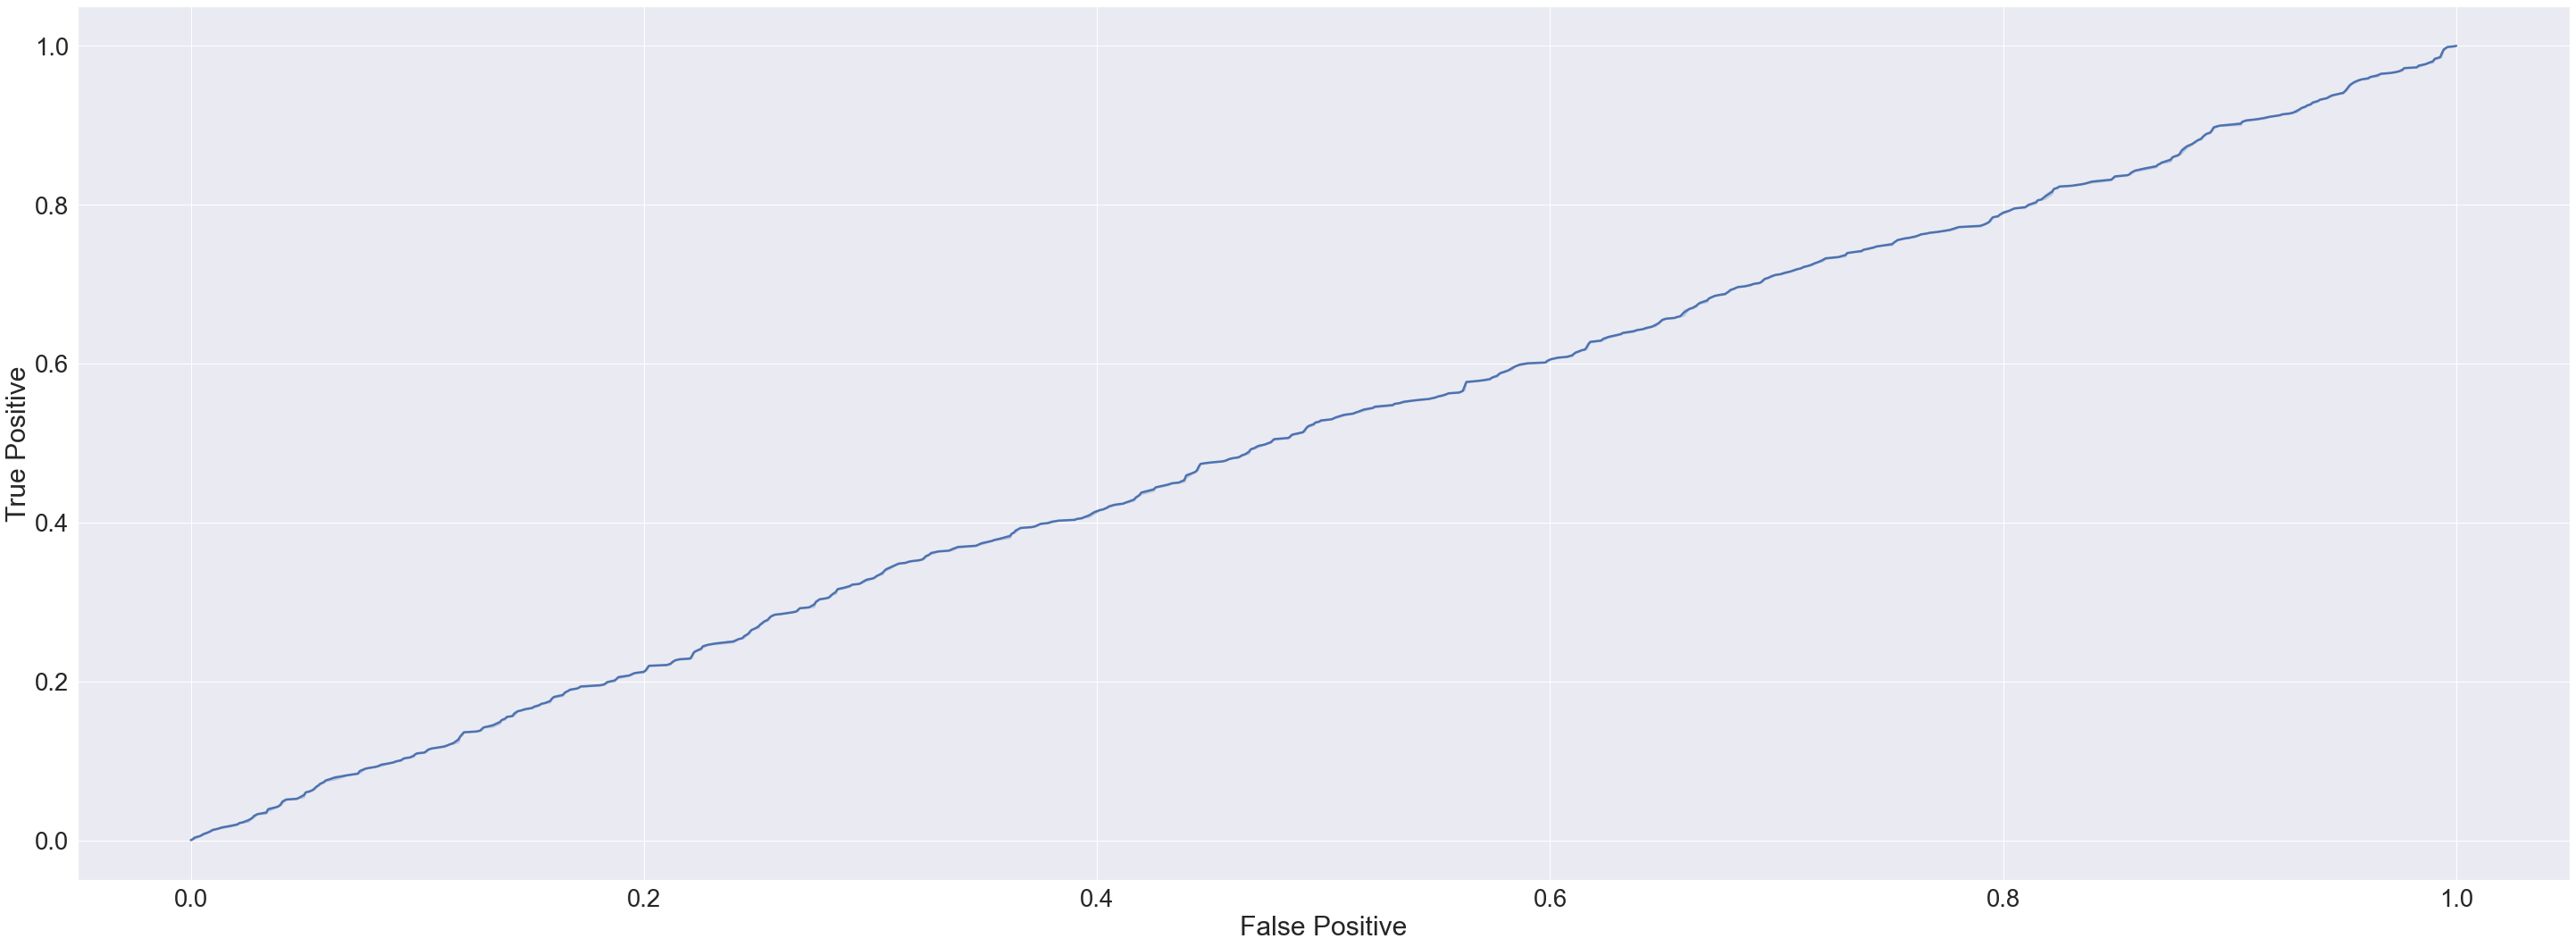

In [42]:
plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
plot.set(xlabel='False Positive', ylabel='True Positive')

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; 
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [88]:
df["text"] = df["Negative_Review"] + df["Positive_Review"]


In [89]:
import random # pro zamíchání příklady

In [90]:
score = pd.DataFrame() # dataframe pro výsledky
print("trénink", end="") # začátek tisku průběhu na řádek

with nlp.disable_pipes(other_pipes):  # s dočasně vypnutými ostatními pipes
    
    optimizer = nlp.begin_training() # vytvoření optimalizátoru    
    
    for i in range(n_iter): # iterace přes celou tréninkovou množinu (epocha)
        print(".", end="") # tisk průběhu další iterace na řádek
        losses = {} # příprava pro ukládání informací o ztrátách        
        random.shuffle(train_data) # zamíchání tréninkovou množinou
        
        batch_sizes = compounding(8.0, 40.0, 1.2) # inicializace počtu příkladů ve várkách
        batches = minibatch(train_data, size=batch_sizes) # načtení příkladů ve várkách
        
        for batch in batches: # učení se na každé várce 
            texts, annotations = zip(*batch) # uložení polí dvojic do dvou separátních polí
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) # samotné učení
        
        with textcat.model.use_params(optimizer.averages): # s dočasnou aplikací aktualizovaného modelu
            scorer = nlp.evaluate(test_data) # evaluace modelu na testovacích datech
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i, "loss"] = losses["textcat"] # zapsání končené ztráty do tabulky
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["POSITIVE"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["POSITIVE"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["POSITIVE"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["NEGATIVE"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["NEGATIVE"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["NEGATIVE"]["f"]
            
            #alternativní skórování pomocí ROC a balíčku sklearn
            docs_generator = nlp.pipe(df_test["text"]) # dávkové zpracování testovacích dokumentů
            docs = list(docs_generator) # načtení testovacích dokumentů do listu
            scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu
            
            # kalkulace ROC
            fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                                     y_score = scores, 
                                                     pos_label = "POSITIVE")
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i,"AUC"] = metrics.auc(fpr, tpr)
            
score #zobrazení tabulky se skóre po celém učení

trénink..................................................

,loss,F,P+,R+,F+,P-,R-,F-,AUC
0,0.087478,75.509886,78.428928,64.052953,70.515695,75.469076,86.258936,80.504077,0.815119
1,0.067580,78.951181,78.807947,72.708758,75.635593,79.925094,84.749801,82.266769,0.840904
2,0.066902,79.937377,78.503688,75.865580,77.162092,81.656347,83.796664,82.712662,0.854426
3,0.055520,80.553175,78.243105,78.004073,78.123406,82.884311,83.081811,82.982943,0.862658
4,0.056888,80.296834,78.364389,77.087576,77.720739,82.352941,83.399523,82.872928,0.866978
5,0.057554,80.956894,80.063966,76.476578,78.229167,82.271681,85.146942,83.684621,0.869276
6,0.048396,80.693564,79.617834,76.374745,77.962578,82.140108,84.749801,83.424550,0.871716
7,0.046989,80.890331,79.641350,76.883910,78.238342,82.443929,84.670373,83.542320,0.871259
8,0.046430,81.129646,79.748164,77.393075,78.552972,82.763975,84.670373,83.706321,0.873494
9,0.048066,81.732016,80.271399,78.309572,79.278351,83.398285,84.988086,84.185681,0.875317


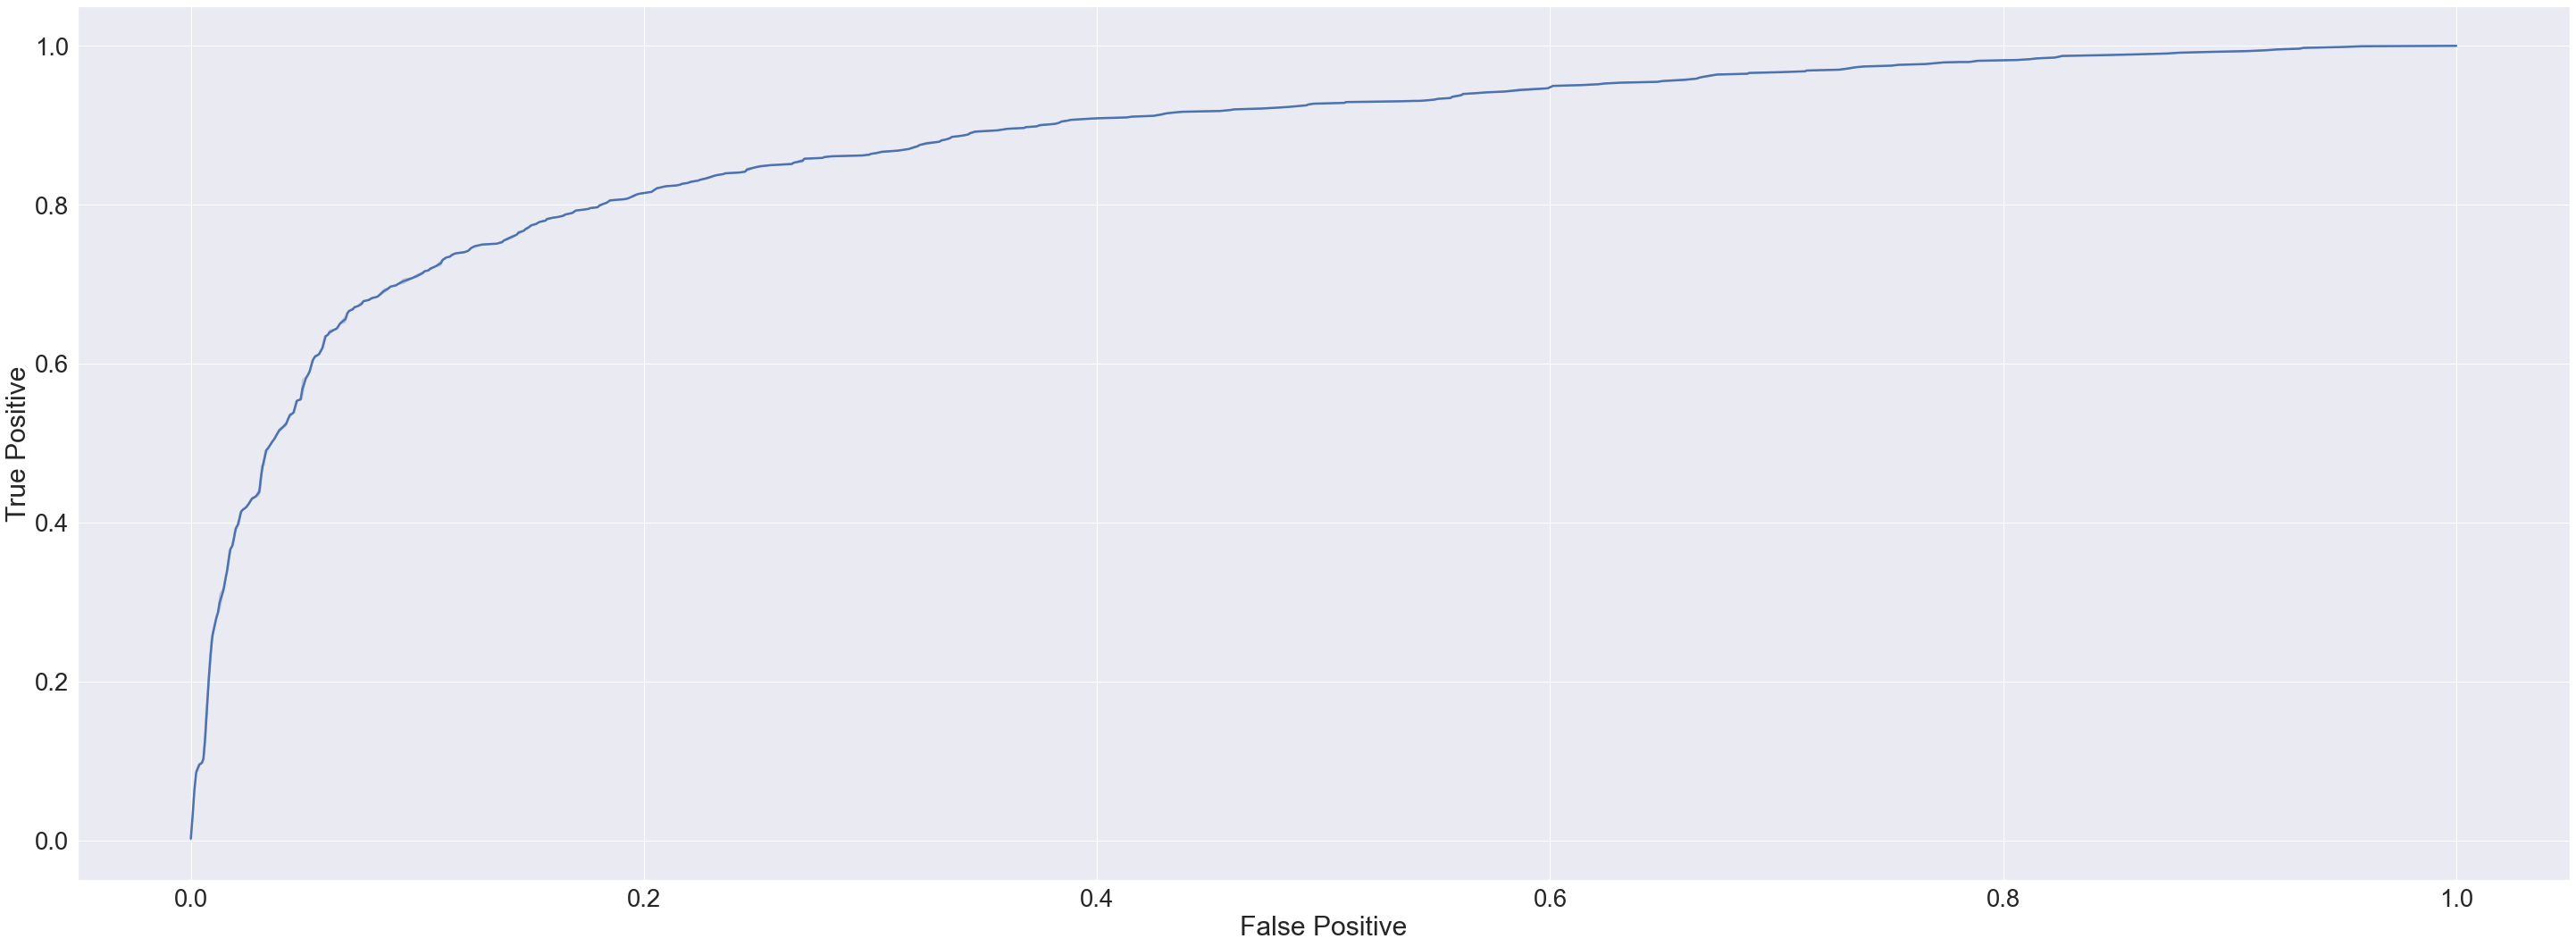

In [91]:
#alternativní skórování pomocí ROC a balíčku sklearn
docs_generator = nlp.pipe(df_test["text"]) # dávkové zpracování testovacích dokumentů
docs = list(docs_generator) # načtení testovacích dokumentů do listu
scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu

# kalkulace ROC
fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                         y_score = scores, 
                                         pos_label = "POSITIVE")

# zobrazení ROC grafu
roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
roc_plot.set(xlabel='False Positive', ylabel='True Positive')
plt.show() # zobrazení křivky za běhu buňky

In [92]:
with nlp.use_params(optimizer.averages):
    nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to model_categorizer


In [93]:
examples = pd.DataFrame(["The rooms were clean.", "They went over and beyond to help make our stay enjoyable.",
                         "The breakfast is one of the best I have ever had in Europe.",
                         "I highly recommend this hotel for anyone visiting downtown", 
                         "We got to hotel super early", "The sevice was exceptional as well.",
                         "Every staff member I encountered were delightful and eager to help!",
                         "The bed was extremely comfortable.", "The room was spacious and clean.",
                         "Beautiful atmosphere inside and outside around that part of the city.",
                         "Everything what you need is possible.", "The room was huge, modern, and spotless.",
                         "This is a beautiful hotel!", "The environment was pleasant and welcoming.",
                         "We could park our motorcycles in the closed garage.", "Great value for money.",
                         "Must definitelly recommend breakfast, good food and variety of it.",
                         "Hot water constantly running out.", "Virtually no cooking utensils",
                         "Beds were extremely uncomfortable", "Pillows were solid hurting your neck when you slept.",
                         "My kid broke his arm there.", "Worst hotel I've stayed in.", "No Wi-Fi inside rooms.",
                         "Fridge was dirty and horrible and the bottom of it was rusty.", "Back-pain guaranteed.",
                         "Only way to let some fresh air inside is to open the main door.", 
                         "Limited hot water in apartments", "Barely slept all week.", 
                         "Staff are extremely rude and unhelpful", "Majority of hotel staff were miserable",
                         "Rooms smelt of cheap air freshener in an attempt to cover up a bad smell.",
                         "Furniture was cheap and didn't match (not a big deal)", "Smells very very ugly from bathroom.",
                         "standards were below what we were expecting."
                        ], 
                        columns=["text"])
examples

,text
0,The rooms were clean.
1,They went over and beyond to help make our sta...
2,The breakfast is one of the best I have ever h...
3,I highly recommend this hotel for anyone visit...
4,We got to hotel super early
5,The sevice was exceptional as well.
6,Every staff member I encountered were delightf...
7,The bed was extremely comfortable.
8,The room was spacious and clean.
9,Beautiful atmosphere inside and outside around...


In [94]:
def evaluate(row, nlp=nlp):
    row["sentiment_score"]=nlp(row["text"]).cats["POSITIVE"]    
    return row

In [95]:
examples = examples.apply(evaluate, nlp=nlp, axis=1)

examples["sentiment"] = pd.cut(examples["sentiment_score"], 
                   bins=[0,0.4,0.6,1], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
examples

,text,sentiment_score,sentiment
0,The rooms were clean.,0.999551,POSITIVE
1,They went over and beyond to help make our sta...,0.999996,POSITIVE
2,The breakfast is one of the best I have ever h...,0.197411,NEGATIVE
3,I highly recommend this hotel for anyone visit...,0.059877,NEGATIVE
4,We got to hotel super early,0.999554,POSITIVE
5,The sevice was exceptional as well.,0.999980,POSITIVE
6,Every staff member I encountered were delightf...,0.999999,POSITIVE
7,The bed was extremely comfortable.,0.999983,POSITIVE
8,The room was spacious and clean.,0.999919,POSITIVE
9,Beautiful atmosphere inside and outside around...,0.995286,POSITIVE


In [96]:
# Uloženie modelu
nlp_disk = spacy.load(output_dir)

In [97]:
examples_disk = examples.copy()
examples_disk = examples_disk.apply(evaluate, nlp=nlp_disk, axis=1)
examples_disk["sentiment"] = pd.cut(examples_disk["sentiment_score"], 
                   bins=[0,0.4,0.6,1], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
examples_disk

,text,sentiment_score,sentiment
0,The rooms were clean.,0.998882,POSITIVE
1,They went over and beyond to help make our sta...,0.999985,POSITIVE
2,The breakfast is one of the best I have ever h...,0.259896,NEGATIVE
3,I highly recommend this hotel for anyone visit...,0.143556,NEGATIVE
4,We got to hotel super early,0.999322,POSITIVE
5,The sevice was exceptional as well.,0.999961,POSITIVE
6,Every staff member I encountered were delightf...,0.999999,POSITIVE
7,The bed was extremely comfortable.,0.999966,POSITIVE
8,The room was spacious and clean.,0.999870,POSITIVE
9,Beautiful atmosphere inside and outside around...,0.995284,POSITIVE


In [98]:
#rozdelenie podľa mesta
df['City']= df.Hotel_Address.apply(lambda x: x.split(' ')[-2])
df["City"]=df["City"].apply(lambda x: x.replace("United","London"))
df[['Hotel_Name','City','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:25]

,Hotel_Name,City,Average_Score,Total_Number_of_Reviews
6551,Ritz Paris,Paris,9.8,122
6379,Haymarket Hotel,4HX,9.6,255
7379,41,0PS,9.6,244
10845,Hotel The Serras,Barcelona,9.6,604
9020,Hotel Casa Camper,Barcelona,9.6,732
8780,H10 Casa Mimosa 4 Sup,Barcelona,9.6,454
3519,Hotel Sacher Wien,Vienna,9.5,632
9653,The Soho Hotel,3DH,9.5,385
9091,Le Narcisse Blanc Spa,Paris,9.5,222
10773,Taj 51 Buckingham Gate Suites and Residences,6AF,9.5,310


In [100]:
# Group the data by nationality
group_nationality = df.pivot_table(values = "Reviewer_Score", 
                                   index = "Reviewer_Nationality", 
                                   aggfunc=["mean","count"])
group_nationality.columns = ["mean_review","review_count"]